<a href="https://colab.research.google.com/github/vlad-danaila/machine-learning-workout/blob/master/Pytorch_Workout_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Logistic regression**

In [198]:
!pip3 install torch 

In [0]:
import numpy as np
import torch as t
import sklearn as sk
import sklearn.datasets
import matplotlib.pyplot as plt

**Generate data**

In [0]:
x, y = sk.datasets.make_blobs(centers = [[2, 2], [3, 4]])

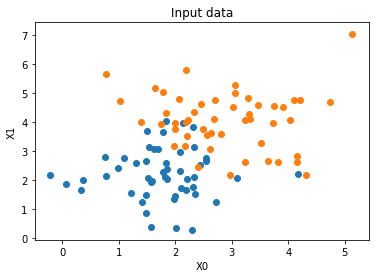

In [201]:
def plot_data():
  plt.scatter(x[y == 0, 0], x[y == 0, 1])
  plt.scatter(x[y == 1, 0], x[y == 1, 1])
  plt.title('Input data')
  plt.xlabel('X0')
  plt.ylabel('X1')

plot_data()

**Define model**

In [0]:
class LogisticRegression(t.nn.Module):
  
  def __init__(self, input_size):
    super().__init__()
    self.linear = t.nn.Linear(input_size, 1)
    
  def forward(self, x):
    return t.sigmoid(self.linear(x))
  
  def predict(self, x):
    return 1 if self.forward(x) > 0.5 else 0

**Training**

In [0]:
epochs = 10000
model = LogisticRegression(2)
optimizer = t.optim.SGD(model.parameters(), lr = 0.01)
loss_fn = t.nn.BCELoss()

In [204]:
losses = []
x_train, y_train = t.Tensor(x), t.Tensor(y)

for i in range(epochs):
  y_pred = model.forward(x_train)
  loss = loss_fn(y_pred, y_train)
  loss.backward()
  optimizer.step()
  optimizer.zero_grad()
  losses.append(loss.detach().numpy())

/usr/local/lib/python3.6/dist-packages/torch/nn/modules/loss.py:512: UserWarning: Using a target size (torch.Size([100])) that is different to the input size (torch.Size([100, 1])) is deprecated. Please ensure they have the same size.
  return F.binary_cross_entropy(input, target, weight=self.weight, reduction=self.reduction)


Text(0, 0.5, 'Loss')

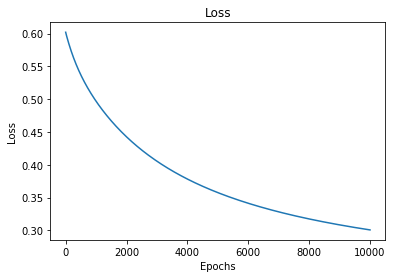

In [205]:
plt.title('Loss')
plt.plot(range(epochs), losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')

**Plot decision boundary**

0.5 is the sigmoid y inflection point

sigmoid(x1 * w1 + x2 * w2 + b) = 0.5

sigmoid is 0.5 at 0

x1 * w1 + x2 * w2 + b = 0

x2 = - (x1 * w1 + b) / w2


Text(0.5, 1.0, 'Decision boundry')

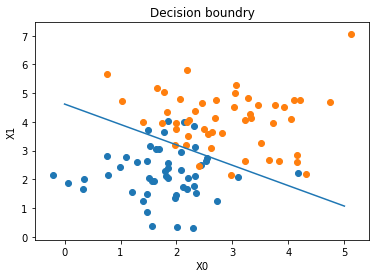

In [206]:
w, b = model.parameters()
w, b = np.array(w.view(-1).detach()), np.array(b.detach())
x1 = np.arange(6)
x2 = -(x1 * w[0] + b) / w[1]
plt.plot(x1, x2)
plot_data()
plt.title('Decision boundry')